In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [41]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [44]:
# Inspect the Columns in measurement
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [45]:
# Inspect the Columns in station
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).limit(10).all()

[('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-23',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-22',),
 ('2017-08-21',),
 ('2017-08-21',),
 ('2017-08-21',)]

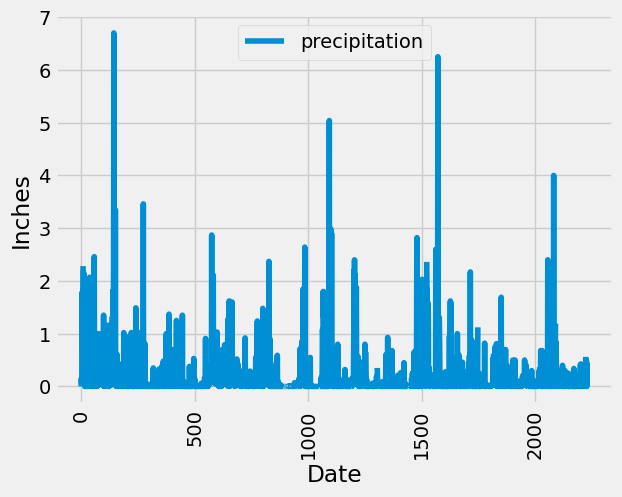

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.

query_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= query_date).order_by(Measurement.date.asc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
Precipitation = pd.DataFrame(precipitation, columns=('date','precipitation'))

Precipitation.set_index("date")

# Sort the dataframe by date

    # NOTE dataframe is already sorted by date when data was queried

# Use Pandas Plotting with Matplotlib to plot the data

Precipitation.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation = 90)

    #@TODO --> need to fix the labels of the X axis to represent the dates

plt.tight_layout
plt.show()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_statistics = session.query(Measurement.prcp, Measurement.tobs, Measurement.station).all()
precipitation_statistics_df = pd.DataFrame(precipitation_statistics, columns=("prcp","tobs", "station"))
(precipitation_statistics_df.groupby(precipitation_statistics_df.station)).agg(['mean','median','var',"std",'sem'])


prcp                                            tobs         \
                 mean median       var       std       sem       mean median   
station                                                                        
USC00511918  0.047971   0.00  0.059940  0.244826  0.005570  71.615968   72.0   
USC00513117  0.141921   0.02  0.188274  0.433905  0.008357  72.689184   73.0   
USC00514830  0.121058   0.02  0.171240  0.413812  0.009402  74.873297   75.0   
USC00516128  0.429988   0.16  0.508367  0.712999  0.014306  70.915008   71.0   
USC00517948  0.063602   0.00  0.059502  0.243931  0.009334  74.684402   75.0   
USC00518838  0.207222   0.03  0.258374  0.508305  0.027486  72.724070   73.0   
USC00519281  0.212352   0.04  0.295187  0.543312  0.010319  71.663781   72.0   
USC00519397  0.049020   0.00  0.044345  0.210583  0.004064  74.553231   76.0   
USC00519523  0.114961   0.00  0.168295  0.410237  0.008089  74.543649   75.0   

                                            
                   var       std       sem  
station                                     
USC00511918  29.989957  5.476309  0.123102  
USC00513117  13.138218  3.624668  0.069641  
USC00514830  14.534144  3.812367  0.081243  
USC00516128  12.417898  3.523904  0.068951  
USC00517948  19.211048  4.383041  0.118331  
USC00518838  17.180576  4.144946  0.183362  
USC00519281  18.989045  4.357642  0.082767  
USC00519397  21.433449  4.629627  0.088704  
USC00519523  18.689717  4.323161  0.083681

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset

# This first query is to get the details for all the stations available in the table

session.query(Station.name,Station.station).all()



[('WAIKIKI 717.2, HI US', 'USC00519397'),
 ('KANEOHE 838.1, HI US', 'USC00513117'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830'),
 ('PEARL CITY, HI US', 'USC00517948'),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523'),
 ('WAIHEE 837.5, HI US', 'USC00519281'),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918'),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128')]

In [ ]:
# This is the query that gets the number of stations
session.query(func.count(Station.name)).all()

[(9,)]

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,Station.name, func.count(Measurement.station)).filter(Measurement.station == Station.station).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(85.0, 54.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

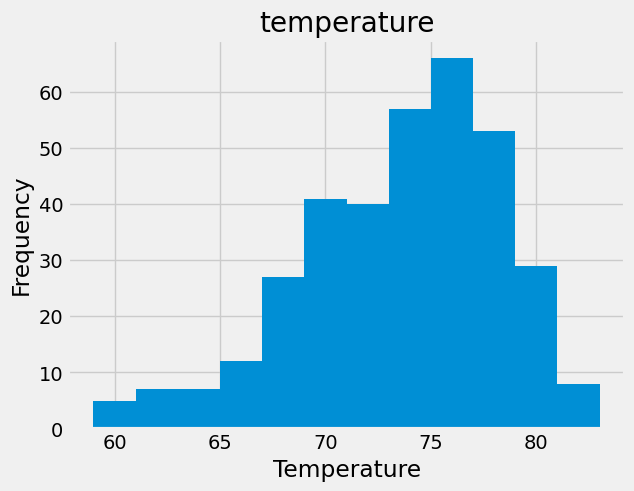

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281',).filter(Measurement.date >= query_date).\
    order_by(Measurement.date.desc()).all()

# Setting the DataFrame and setting data as index
Temperature = pd.DataFrame(most_active,columns=("date", "temperature"))
Temperature.set_index(Temperature["date"])

# Creating a histogram with 12 bins
Temperature.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [ ]:
# Close Session
session.close()